In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as nm
import math
import operator
import random

In [2]:
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
#Getting Features
X=dataset.iloc[:,[2,3]].values
X=X.tolist()
# Getting Label
Y=dataset.iloc[:,[4]].values
Y=[x[0] for x in Y]
for i,k in enumerate(X):
    k.append(Y[i])
for k in X:
    k[1]=k[1]/1000
X

[[19, 19.0, 0],
 [35, 20.0, 0],
 [26, 43.0, 0],
 [27, 57.0, 0],
 [19, 76.0, 0],
 [27, 58.0, 0],
 [27, 84.0, 0],
 [32, 150.0, 1],
 [25, 33.0, 0],
 [35, 65.0, 0],
 [26, 80.0, 0],
 [26, 52.0, 0],
 [20, 86.0, 0],
 [32, 18.0, 0],
 [18, 82.0, 0],
 [29, 80.0, 0],
 [47, 25.0, 1],
 [45, 26.0, 1],
 [46, 28.0, 1],
 [48, 29.0, 1],
 [45, 22.0, 1],
 [47, 49.0, 1],
 [48, 41.0, 1],
 [45, 22.0, 1],
 [46, 23.0, 1],
 [47, 20.0, 1],
 [49, 28.0, 1],
 [47, 30.0, 1],
 [29, 43.0, 0],
 [31, 18.0, 0],
 [31, 74.0, 0],
 [27, 137.0, 1],
 [21, 16.0, 0],
 [28, 44.0, 0],
 [27, 90.0, 0],
 [35, 27.0, 0],
 [33, 28.0, 0],
 [30, 49.0, 0],
 [26, 72.0, 0],
 [27, 31.0, 0],
 [27, 17.0, 0],
 [33, 51.0, 0],
 [35, 108.0, 0],
 [30, 15.0, 0],
 [28, 84.0, 0],
 [23, 20.0, 0],
 [25, 79.0, 0],
 [27, 54.0, 0],
 [30, 135.0, 1],
 [31, 89.0, 0],
 [24, 32.0, 0],
 [18, 44.0, 0],
 [29, 83.0, 0],
 [35, 23.0, 0],
 [27, 58.0, 0],
 [24, 55.0, 0],
 [23, 48.0, 0],
 [28, 79.0, 0],
 [22, 18.0, 0],
 [32, 117.0, 0],
 [27, 20.0, 0],
 [25, 87.0, 0],
 [2

Got data in required format now KNN

In [4]:
def loader(training_data,test_data,split_ratio):
    for x in range(len(X)- 1):
        # iterate each row of dataset
        for y in range(len(X[x])):
            #iterate first 4 columns of xth row
            X[x][y] = float(X[x][y])
            if random.random() < split_ratio:
                # split data into two parts, training_data and test_data. The distribution is random and approximate ratio of split is equal to split_ratio
                training_data.append(X[x])
            else:
                test_data.append(X[x])

# Implementing KNN from scratch


In [5]:
def euclidean_distance(ins1,ins2,features):
    distance = 0
    for x in range(0,features):
        distance += pow(float(ins1[x])-float(ins2[x]),2)
    return math.sqrt(distance)

In [6]:
def mod(x):
    if(x>=0):
        return x
    return -x

In [7]:
def ManH(point1,point2,features):
    sum=0
    for x in range(0,features):
        sum+=mod(float(point1[x])-float(point2[x]))
    return sum

In [8]:
def getNeighbours(data,test_point,k):
    
    distances = []
    for x in range(len(data)):
        distance = euclidean_distance(test_point,data[x],len(test_point)-1)
        distances.append((data[x],distance))
    distances.sort(key=operator.itemgetter(1))
    neigh=[]
    for i in range(k):
        neigh.append(distances[i])
    return [d[0] for d in neigh] 

In [9]:
def getResponseVotes(neighbours):
    classvotes = {}       
    #print(neighbours)
    for x in range(len(neighbours)):       
        response = neighbours[x][-1]       
        if response in classvotes:
            classvotes[response] +=1
        else:
            classvotes[response] = 1
    sortedvotes = sorted(classvotes.items(),key = operator.itemgetter(1),reverse = True)    
    return sortedvotes[0][0]

In [10]:
def getAccuracy(test_data,predictions):
    '''
    function to calculate accuracy of our kNN model.
    '''
    correct = 0     # to keep count of the iris-types which were predicted correctly by our model

    for x in range(len(test_data)):
        if test_data[x][-1] == predictions[x]:
            correct+=1
            
    return (correct/float(len(test_data)))*100.0     # return percentage accuracy   

In [11]:
def generatePredictions(training_data,test_data,predictions,k):
    for x in range(len(test_data)):                       
        neighbours = getNeighbours(training_data, test_data[x],k)
        #print(neighbours)
        prediction = getResponseVotes(neighbours)
        predictions.append(prediction)    

In [12]:
def plotter(test_data,given):
    #Visualization test data
    x_axis=[x[0] for x in test_data]
    y_axis=[x[1] for x in test_data]
    label=[x[2] for x in test_data]
    x_axis1=[]
    x_axis0=[]
    y_axis1=[]
    y_axis0=[]
    for i in range(len(x_axis)):
        if(label[i]==0):
            x_axis0.append(x_axis[i])
        else:
            x_axis1.append(x_axis[i])
    for i in range(len(y_axis)):
        if(label[i]==0):
            y_axis0.append(y_axis[i])
        else:
            y_axis1.append(y_axis[i])
    plt.scatter(x_axis0,y_axis0,color='blue')
    plt.scatter(x_axis1,y_axis1,color='red')
    plt.xlabel('Age')
    plt.ylabel('Salary(X1000)')
    plt.title(given)
    plt.show()

In [13]:
def main(k):
    k=10
    test_data=[]
    training_data=[]
    loader(training_data,test_data,0.81)
    
    predictions = []    
    generatePredictions(training_data,test_data,predictions,k)
    #print(predictions)
    '''
    determine model accuracy by comparing predictions with the actual test_data
    '''
    modelAccuracy = getAccuracy(test_data,predictions)
    print("Accuracy:%0.1f"%(modelAccuracy)+"%")
    print('For k =',k)
    plotter(test_data,"Test Results")
    plotter(training_data,"Training Data")
    return modelAccuracy

Accuracy:93.0%
For k = 10


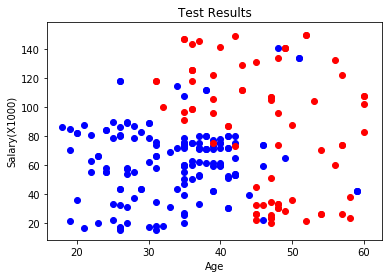

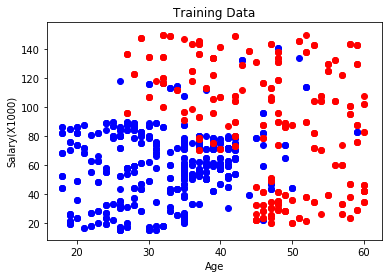

Accuracy:92.1%
For k = 10


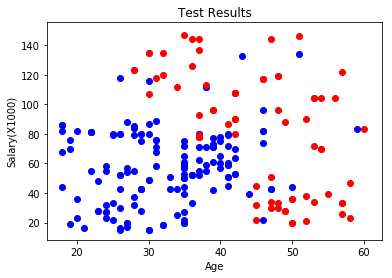

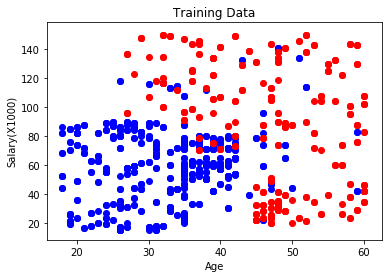

Accuracy:92.7%
For k = 10


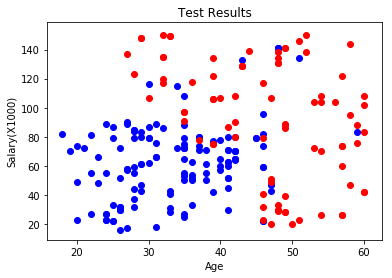

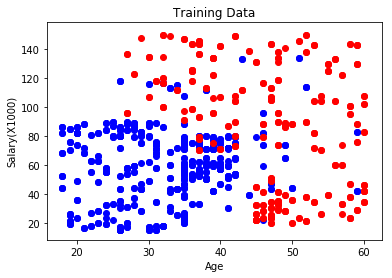

Accuracy:95.2%
For k = 10


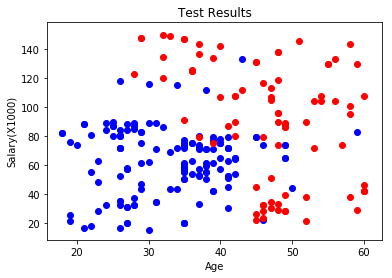

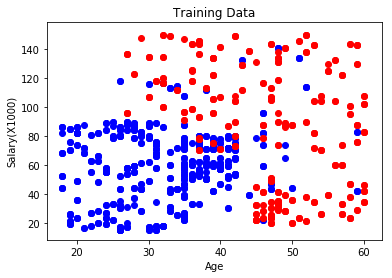

Accuracy:93.3%
For k = 10


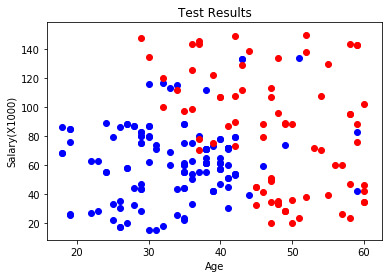

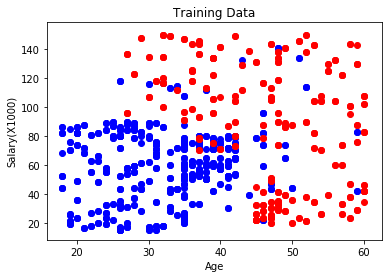

Accuracy:93.7%
For k = 10


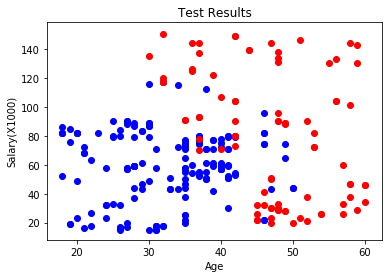

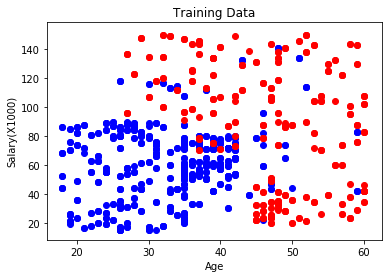

Accuracy:91.6%
For k = 10


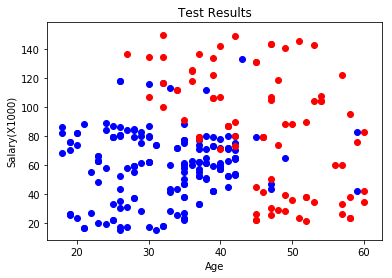

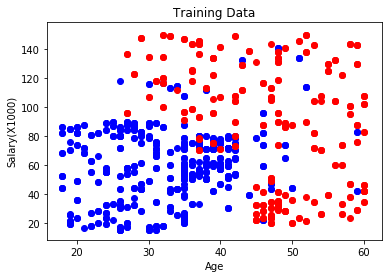

Accuracy:94.7%
For k = 10


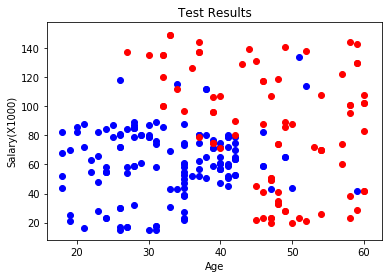

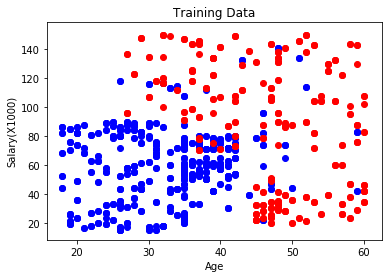

Accuracy:92.8%
For k = 10


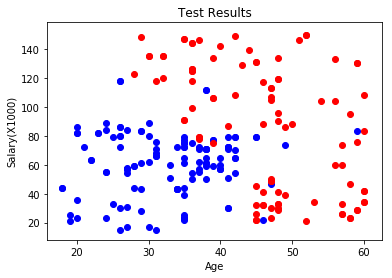

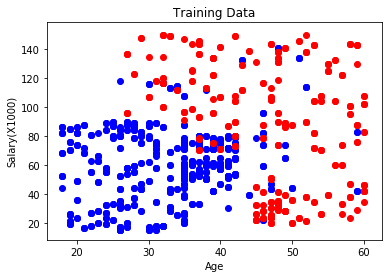

Accuracy:90.3%
For k = 10


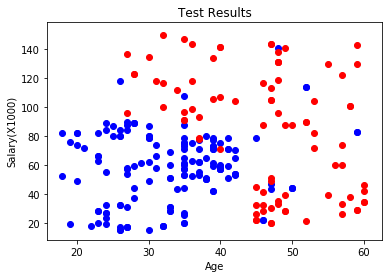

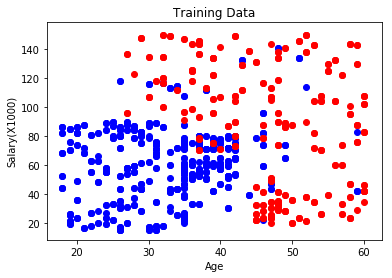

Accuracy:94.6%
For k = 10


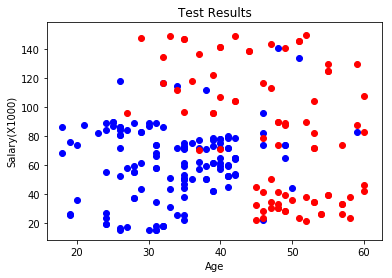

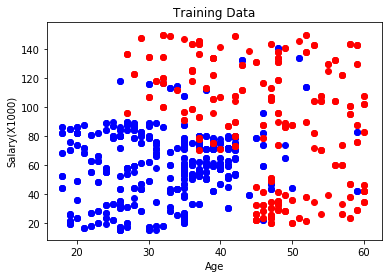

Accuracy:91.7%
For k = 10


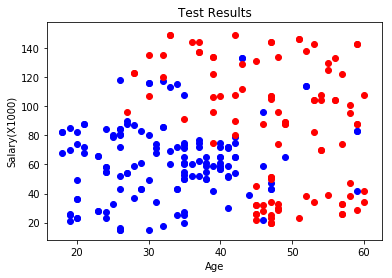

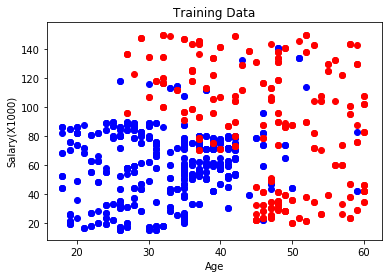

Accuracy:90.1%
For k = 10


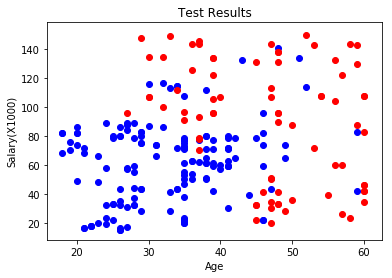

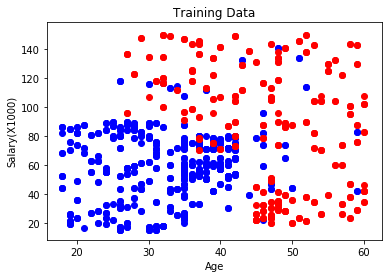

Accuracy:91.3%
For k = 10


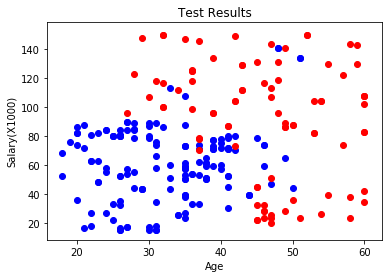

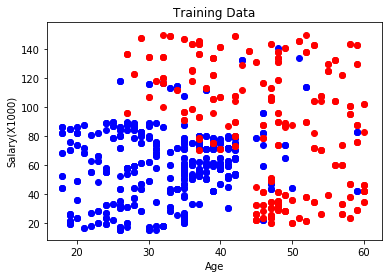

Accuracy:93.6%
For k = 10


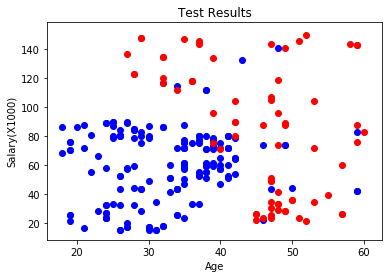

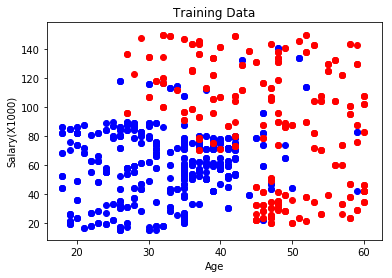

Accuracy:91.7%
For k = 10


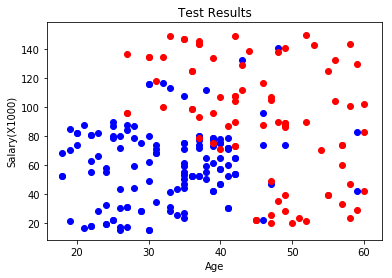

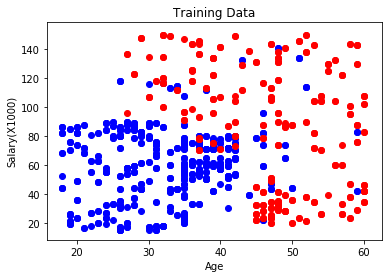

Accuracy:92.0%
For k = 10


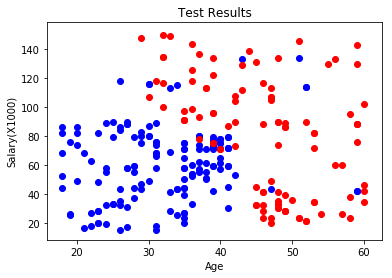

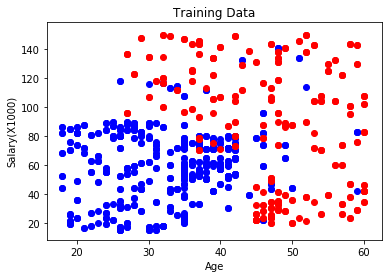

Accuracy:92.7%
For k = 10


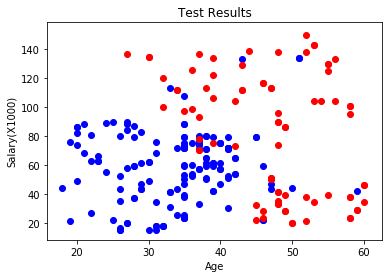

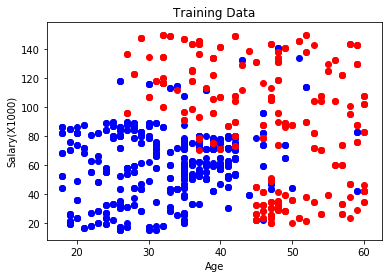

Accuracy:94.2%
For k = 10


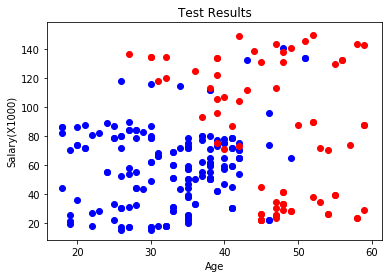

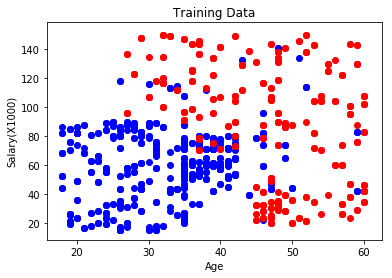

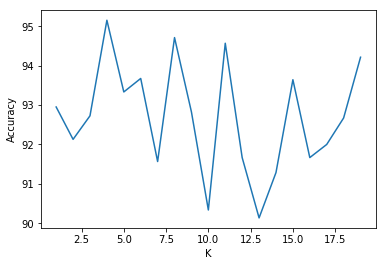

In [14]:
# getting Accuracy for different values of k
k=[]
Accuracy=[]
for kp in range(1,20):
    Accuracy.append(main(kp))
    k.append(kp)
plt.plot(k,Accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


In [15]:
#Maximum accuracy at k=4 but not varying too much
# Inference:
# Younger People with low salary  do not tend to buy the product
# Younger People with high salary and old people are the target customers